## Feature Selection with correlation matrix

### Importing libraries and loading the data

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data = pd.read_csv("global_heat_index.csv")
data.head()

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
0,2011,1,1,0,8,13.522659,986.761841,72.295858,37.288387,3.011042,0
1,2011,1,1,1,8,12.835814,986.441406,75.376186,37.686718,3.091243,0
2,2011,1,1,2,8,12.198058,985.736511,78.405198,35.053905,3.007649,0
3,2011,1,1,3,8,11.583500,985.525696,81.042980,30.135216,2.926715,0
4,2011,1,1,4,8,11.029578,985.661926,82.548508,24.402969,2.915177,0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   17520 non-null  int64  
 1   Month                  17520 non-null  int64  
 2   Day                    17520 non-null  int64  
 3   Hour                   17520 non-null  int64  
 4   Dew Point              17520 non-null  int64  
 5   Temperature            17520 non-null  float64
 6   Pressure               17520 non-null  float64
 7   Relative Humidity      17520 non-null  float64
 8   Wind Direction         17520 non-null  float64
 9   Wind Speed             17520 non-null  float64
 10  Solar Radiation (GHI)  17520 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 1.5 MB


### Cleaning the data

In [11]:
clean1 = data[data['Hour']<6]
clean2 = data[data['Hour']>18]

print("Cleaning data from 12:00 am to :59 am")
clean2.head()

Cleaning data from 12:00 am to :59 am


,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
19,2011,1,1,19,4,13.915211,987.175781,52.122064,38.189991,2.709682,0
20,2011,1,1,20,3,13.106395,987.245666,53.782549,45.614468,2.713746,0
21,2011,1,1,21,3,12.326217,986.971375,55.613451,53.939449,2.701125,0
22,2011,1,1,22,3,11.570982,986.042419,57.458358,62.491528,2.639709,0
23,2011,1,1,23,3,10.869849,985.439819,59.446614,71.250389,2.511646,0


In [12]:
data = data.drop(clean1.index, axis = 0)
data = data.drop(clean2.index, axis = 0)

In [13]:
data.shape

(9490, 11)

In [14]:
data.describe()

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
count,9490.000000,9490.000000,9490.000000,9490.000000,9490.000000,9490.000000,9490.000000,9490.000000,9490.000000,9490.000000,9490.000000
mean,2011.500000,6.526027,15.720548,12.000000,11.172603,29.843403,979.837013,41.346867,192.621930,2.404642,433.934668
std,0.500026,3.448033,8.796710,3.741855,11.204963,8.272602,6.183468,25.653292,98.401266,1.241931,307.352650
min,2011.000000,1.000000,1.000000,6.000000,-28.000000,5.063506,964.755859,0.921771,0.034660,0.030113,0.000000
25%,2011.000000,4.000000,8.000000,9.000000,2.000000,24.991642,974.409988,18.638580,98.280884,1.488960,148.000000
50%,2011.500000,7.000000,16.000000,12.000000,11.000000,30.117739,980.606934,39.359365,230.102280,2.246798,446.000000
75%,2012.000000,10.000000,23.000000,15.000000,22.000000,34.920360,985.049332,61.814032,258.325935,3.153406,693.000000
max,2012.000000,12.000000,31.000000,18.000000,27.000000,52.157927,993.353210,100.000000,359.821167,7.287084,1001.000000


### Input and output data

In [15]:
x = data.iloc[:,0:10]
y = data.iloc[:,-1]

In [16]:
from sklearn.preprocessing import MinMaxScaler

x = pd.DataFrame(MinMaxScaler().fit_transform(x))

In [17]:
x.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.000000,0.545455,0.058249,0.751583,0.667870,0.266273,0.245979
1,0.0,0.0,0.0,0.083333,0.545455,0.084360,0.779201,0.637009,0.292294,0.218438
2,0.0,0.0,0.0,0.166667,0.563636,0.150650,0.809220,0.546880,0.314862,0.194155
3,0.0,0.0,0.0,0.250000,0.563636,0.210254,0.820218,0.466754,0.326007,0.142382
4,0.0,0.0,0.0,0.333333,0.563636,0.294994,0.814713,0.361586,0.201380,0.071046


In [18]:
data.head()

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
6,2011,1,1,6,2,7.806705,986.249146,67.093181,95.835983,1.815175,0
7,2011,1,1,7,2,9.036408,987.038940,64.035483,105.198181,1.615310,0
8,2011,1,1,8,3,12.158280,987.897400,55.105656,113.317665,1.439088,159
9,2011,1,1,9,3,14.965301,988.211914,47.166938,117.327606,1.063374,363
10,2011,1,1,10,3,18.956082,988.054504,36.747087,72.488327,0.545695,533


## Correlation Matrix with Heatmap

In [19]:
corr_matrix = data.corr()

In [20]:
corr_matrix

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
Year,1.000000e+00,-1.206348e-12,-7.235267e-14,-1.408221e-15,-0.139773,0.026887,0.020252,-0.166373,0.011996,0.037455,-0.013891
Month,-1.206348e-12,1.000000e+00,1.189318e-02,2.332832e-15,0.491577,-0.038576,-0.036657,0.460993,-0.102648,-0.216902,-0.090227
Day,-7.235267e-14,1.189318e-02,1.000000e+00,2.843627e-17,-0.017772,-0.011873,0.046708,-0.005074,-0.021712,0.038542,0.011420
Hour,-1.408221e-15,2.332832e-15,2.843627e-17,1.000000e+00,-0.020686,0.269499,-0.183460,-0.211869,0.113641,0.006593,0.040573
Dew Point,-1.397731e-01,4.915774e-01,-1.777210e-02,-2.068626e-02,1.000000,0.198330,-0.587488,0.790023,0.160133,0.072254,-0.024650
Temperature,2.688710e-02,-3.857553e-02,-1.187262e-02,2.694991e-01,0.198330,1.000000,-0.627170,-0.344609,0.431627,0.263510,0.608713
Pressure,2.025241e-02,-3.665724e-02,4.670753e-02,-1.834597e-01,-0.587488,-0.627170,1.000000,-0.244693,-0.428785,-0.435057,-0.144057
Relative Humidity,-1.663735e-01,4.609927e-01,-5.073932e-03,-2.118687e-01,0.790023,-0.344609,-0.244693,1.000000,-0.053618,-0.107921,-0.371410
Wind Direction,1.199631e-02,-1.026477e-01,-2.171216e-02,1.136411e-01,0.160133,0.431627,-0.428785,-0.053618,1.000000,0.207285,0.168475
Wind Speed,3.745498e-02,-2.169017e-01,3.854214e-02,6.593433e-03,0.072254,0.263510,-0.435057,-0.107921,0.207285,1.000000,0.007935


<AxesSubplot:>

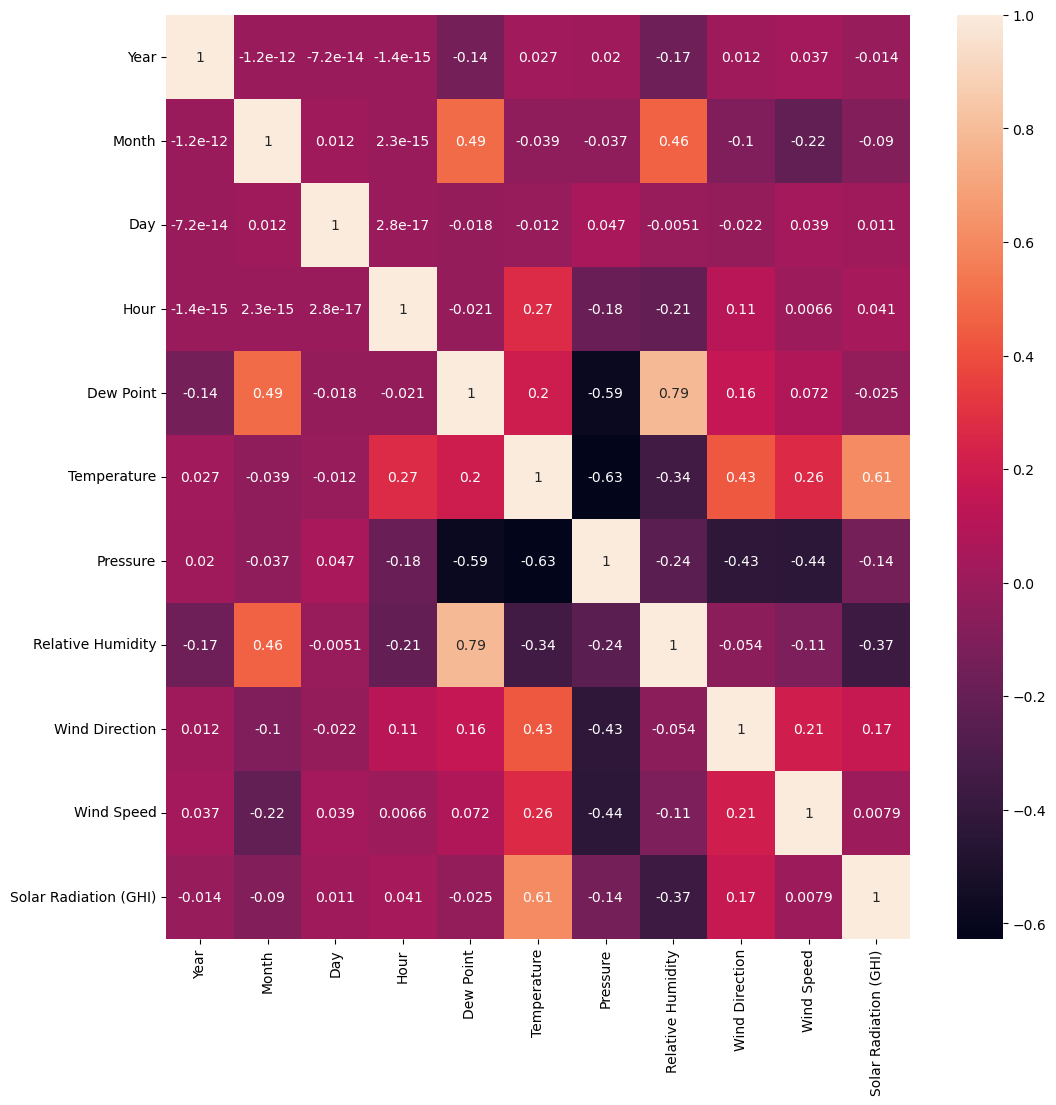

In [21]:
plt.figure(figsize = (12,12))
sns.heatmap(data.corr(), annot = True)

# EXTRA TREE CLASSIFIER

In [22]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [23]:
col = ['Year','Month','Day','Hour','Dew Point','Temperature','Pressure','Relative Humidity','Wind Direction','Wind Speed']
feature_imp = pd.Series(model.feature_importances_, index = col)
feature_imp

Year                 0.026731
Month                0.043217
Day                  0.109495
Hour                 0.111072
Dew Point            0.089223
Temperature          0.138216
Pressure             0.124091
Relative Humidity    0.123358
Wind Direction       0.116677
Wind Speed           0.117919
dtype: float64

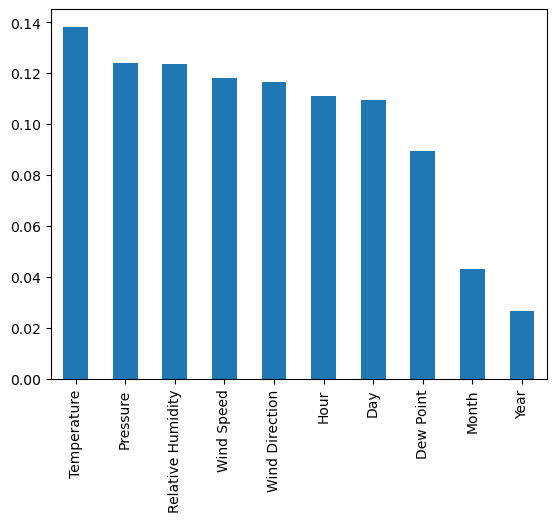

In [24]:
feature_imp.nlargest(10).plot(kind = "bar")
plt.show()

# FEATURE SELECTION WITH SELECT K BEST METHOD

In [25]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 

In [26]:
bestfeatures = SelectKBest(score_func=chi2, k=10).fit(x,y)

In [27]:
scores = pd.DataFrame(bestfeatures.scores_)
columns = pd.DataFrame(col)


In [28]:
feature_score = pd.concat([columns,scores], axis =1)
feature_score.columns = ['Features', 'Scores']

In [29]:
feature_score

,Features,Scores
0,Year,504.976721
1,Month,236.303859
2,Day,208.497847
3,Hour,271.978728
4,Dew Point,74.952667
5,Temperature,306.062548
6,Pressure,213.040872
7,Relative Humidity,397.828591
8,Wind Direction,221.823327
9,Wind Speed,148.735716


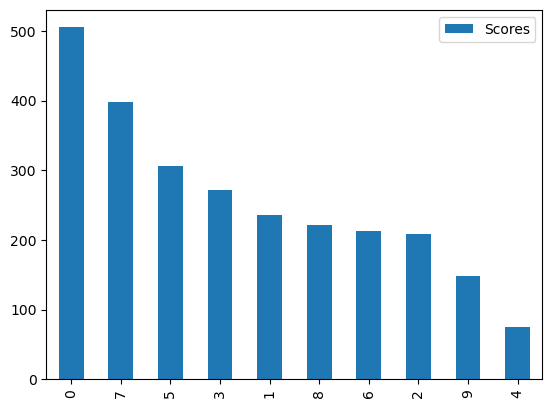

In [30]:
feature_score.nlargest(10,"Scores").plot(kind = "bar")
plt.show()

# PCA - Principal Component Analysis

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### Loading Data

In [33]:
data = pd.read_csv("global_heat_index.csv")
data.head()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   17520 non-null  int64  
 1   Month                  17520 non-null  int64  
 2   Day                    17520 non-null  int64  
 3   Hour                   17520 non-null  int64  
 4   Dew Point              17520 non-null  int64  
 5   Temperature            17520 non-null  float64
 6   Pressure               17520 non-null  float64
 7   Relative Humidity      17520 non-null  float64
 8   Wind Direction         17520 non-null  float64
 9   Wind Speed             17520 non-null  float64
 10  Solar Radiation (GHI)  17520 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 1.5 MB


,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
count,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000
mean,2011.500000,6.526027,15.720548,11.500000,11.375171,26.953731,979.699263,47.635089,182.306160,2.637895,235.047945
std,0.500014,3.447950,8.796498,6.922384,10.850196,8.417945,6.130488,26.734818,98.695757,1.244842,312.916933
min,2011.000000,1.000000,1.000000,0.000000,-28.000000,5.063506,964.755859,0.921771,0.034660,0.030113,0.000000
25%,2011.000000,4.000000,8.000000,5.750000,3.000000,21.611058,974.325027,23.413340,84.141256,1.718903,0.000000
50%,2011.500000,7.000000,16.000000,11.500000,12.000000,27.455196,980.491516,46.529440,221.495407,2.564217,0.000000
75%,2012.000000,10.000000,23.000000,17.250000,22.000000,32.031030,984.943756,69.450031,250.299492,3.412514,489.250000
max,2012.000000,12.000000,31.000000,23.000000,27.000000,52.157927,993.353210,100.000000,359.989960,7.287084,1001.000000


### Cleaning the Data

In [34]:
clean1 = data[data['Hour']<6]
clean2 = data[data['Hour']>18]

In [35]:
data = data.drop(clean1.index, axis = 0)
data = data.drop(clean2.index, axis = 0)

### Preparing Training and Testing Data

In [36]:
x = data.iloc[:,4:10].values
y = data.iloc[:,10].values

y = y.reshape(-1,1)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [37]:
print(x_train)

[[ 23.          28.95276574 974.4337769   72.00650744 230.5746765
    3.48527336]
 [  7.          31.45725588 982.7936401   21.82772614  43.92575455
    1.79098237]
 [  5.          45.90862693 977.0198364    9.19367135 256.100769
    2.31313491]
 ...
 [  1.          17.1015701  988.6531982   34.68437781   9.09429932
    1.42941236]
 [ 24.          25.72412262 975.875       95.01792758 211.7336121
    2.95700026]
 [ 25.          28.49819406 974.4430542   83.5370614  239.0466156
    2.56590128]]


In [38]:
print(y_train)

[[178]
 [602]
 [830]
 ...
 [231]
 [162]
 [384]]


### Standardizing Data

In [39]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)

In [40]:
print(x_train)
print(y_train)

[[ 1.05968611 -0.10596836 -0.86953246  1.20221031  0.39135863  0.85990992]
 [-0.37392147  0.19583916  0.47710333 -0.76144896 -1.50792046 -0.50344039]
 [-0.55312242  1.93732438 -0.45296102 -1.2558607   0.65110389 -0.08327831]
 ...
 [-0.91152432 -1.53411535  1.4209813  -0.25832627 -1.86235409 -0.79438603]
 [ 1.14928659 -0.49504108 -0.63737524  2.10272218  0.19963805  0.43482279]
 [ 1.23888706 -0.16074724 -0.86803804  1.65343846  0.47756634  0.12011598]]
[[-0.83425739]
 [ 0.55048309]
 [ 1.29510768]
 ...
 [-0.66116483]
 [-0.88651175]
 [-0.16148254]]


### K-Means with 6 clusters

In [45]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 6, random_state=0)
kmeans = kmeans.fit(x_train)

In [46]:
labels = kmeans.labels_
print("Labels:", labels)
cluster_centers = kmeans.cluster_centers_
print("\n\n Cluster Centroids: \n", cluster_centers)

Labels: [4 2 3 ... 5 4 4]


 Cluster Centroids: 
 [[ 0.16514599 -0.37183722  0.64944113  0.20694672  0.67454948 -0.79919315]
 [ 0.4028263   1.05270045 -1.07625442 -0.40782607  0.51052584  1.49341357]
 [-0.62922428 -0.2382606   0.85747373 -0.5826973  -1.35137904 -0.68896787]
 [-1.06742046  0.68333301  0.04957812 -1.16310858  0.83404147  0.01356953]
 [ 1.18774524  0.07107491 -0.93458801  1.27392977  0.25329346 -0.09429523]
 [-0.63825654 -1.64715456  1.1805509   0.27677496 -1.09069466 -0.03323327]]


### Applying PCA - Dimensionality Reduction

In [52]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3).fit(x_train).transform(x_train)
pca

array([[-1.59837425, -1.04649685,  0.6330417 ],
       [ 1.2422458 ,  0.2751212 ,  0.12284497],
       [-0.79398024,  2.07624203, -0.877876  ],
       ...,
       [ 2.88500539, -0.70662158,  0.50501866],
       [-1.31961631, -2.03068811,  0.48038959],
       [-1.55187659, -1.6325982 , -0.01288687]])

In [53]:
x_train

array([[ 1.05968611, -0.10596836, -0.86953246,  1.20221031,  0.39135863,
         0.85990992],
       [-0.37392147,  0.19583916,  0.47710333, -0.76144896, -1.50792046,
        -0.50344039],
       [-0.55312242,  1.93732438, -0.45296102, -1.2558607 ,  0.65110389,
        -0.08327831],
       ...,
       [-0.91152432, -1.53411535,  1.4209813 , -0.25832627, -1.86235409,
        -0.79438603],
       [ 1.14928659, -0.49504108, -0.63737524,  2.10272218,  0.19963805,
         0.43482279],
       [ 1.23888706, -0.16074724, -0.86803804,  1.65343846,  0.47756634,
         0.12011598]])

### Visualisation

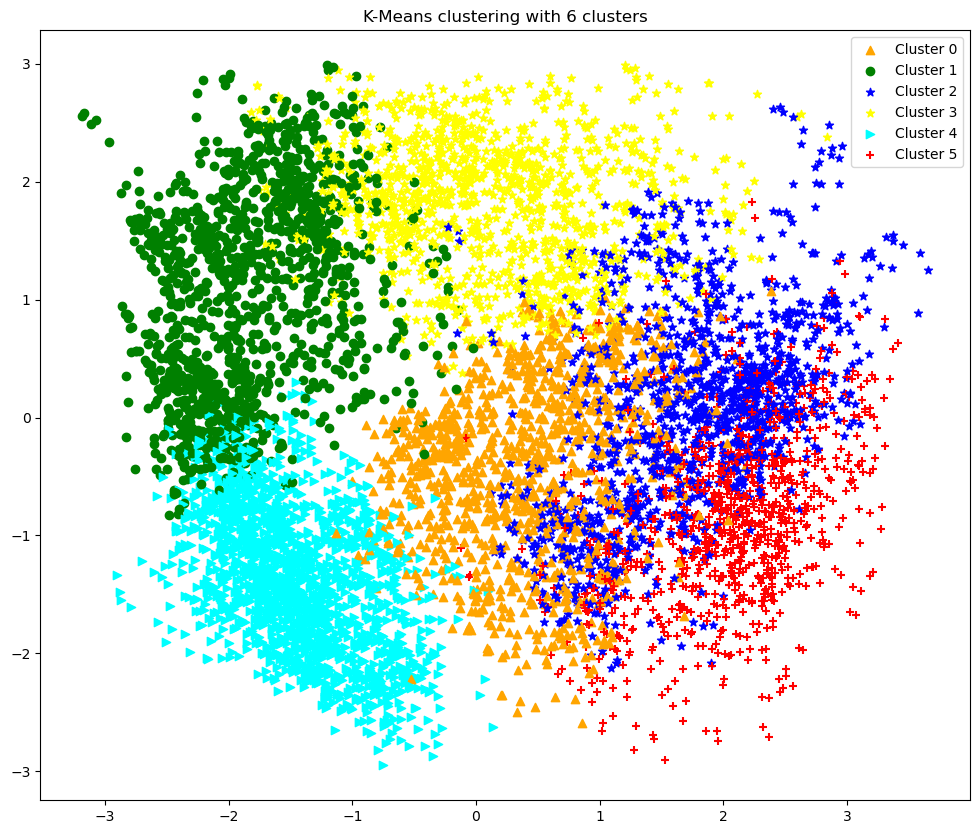

In [54]:
for i in range(0,pca.shape[0]):
    if kmeans.labels_[i] == 0:
        c1_6 = plt.scatter(pca[i,0], pca[i,1], c = "orange", marker = "^")
    elif kmeans.labels_[i] == 1:
        c2_6 = plt.scatter(pca[i,0], pca[i,1], c = "g", marker = "o")
    elif kmeans.labels_[i] == 2:
        c3_6 = plt.scatter(pca[i,0], pca[i,1], c = "b", marker = "*")
    elif kmeans.labels_[i] == 3:
        c4_6 = plt.scatter(pca[i,0], pca[i,1], c = "yellow", marker = "*")
    elif kmeans.labels_[i] == 4:
        c5_6 = plt.scatter(pca[i,0], pca[i,1], c = "cyan", marker = ">")
    elif kmeans.labels_[i] == 5:
        c6_6 = plt.scatter(pca[i,0], pca[i,1], c = "red", marker = "+")

plt.rcParams["figure.figsize"] = (12,10)
plt.legend([c1_6,c2_6,c3_6,c4_6,c5_6, c6_6], ['Cluster 0', 'Cluster 1', 'Cluster 2','Cluster 3','Cluster 4','Cluster 5'])
plt.title("K-Means clustering with 6 clusters")
plt.show()